Epoch 1, Train Accuracy: 0.5940, Train Loss: 2.6261
Epoch 1, Test Accuracy: 0.7529, Test Loss: 1.2985
Epoch 2, Train Accuracy: 0.7841, Train Loss: 1.1148
Epoch 2, Test Accuracy: 0.8122, Test Loss: 0.9389
Epoch 3, Train Accuracy: 0.8271, Train Loss: 0.8629
Epoch 3, Test Accuracy: 0.8387, Test Loss: 0.7888
Epoch 4, Train Accuracy: 0.8499, Train Loss: 0.7313
Epoch 4, Test Accuracy: 0.8536, Test Loss: 0.6959
Epoch 5, Train Accuracy: 0.8633, Train Loss: 0.6452
Epoch 5, Test Accuracy: 0.8642, Test Loss: 0.6351
Epoch 6, Train Accuracy: 0.8740, Train Loss: 0.5828
Epoch 6, Test Accuracy: 0.8726, Test Loss: 0.5948
Epoch 7, Train Accuracy: 0.8819, Train Loss: 0.5339
Epoch 7, Test Accuracy: 0.8789, Test Loss: 0.5553
Epoch 8, Train Accuracy: 0.8884, Train Loss: 0.4945
Epoch 8, Test Accuracy: 0.8839, Test Loss: 0.5290
Epoch 9, Train Accuracy: 0.8939, Train Loss: 0.4619
Epoch 9, Test Accuracy: 0.8887, Test Loss: 0.5039
Epoch 10, Train Accuracy: 0.8993, Train Loss: 0.4342
Epoch 10, Test Accuracy: 0.89

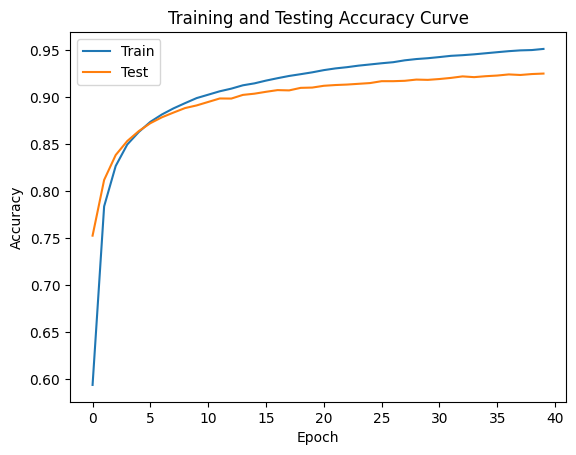

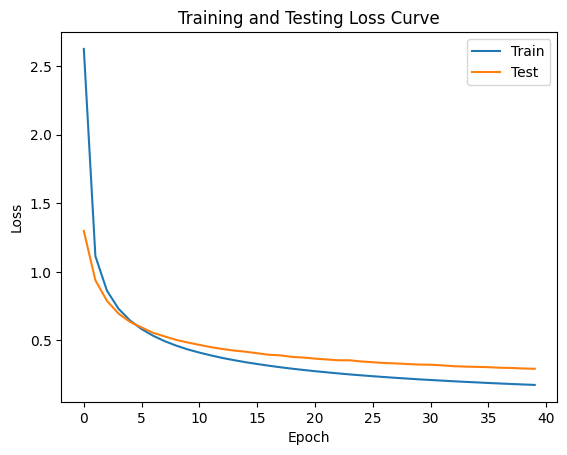

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Define the hyperparameters
d = 784 # input dimension
d1 = 300 # hidden dimension
k = 10 # output dimension
lr = 0.01 # learning rate
batch_size = 16 # batch size
epochs = 40 # number of epochs

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
# Define the activation functions and the loss function
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

# Define the softmax function
def softmax(z):
    exp_z = torch.exp(z)
    return exp_z / torch.sum(exp_z, dim=1, keepdim=True)

# Define the cross-entropy loss function
def cross_entropy(y_pred, y_true):
    return -torch.sum(y_true * torch.log(y_pred), dim=1).mean()


# Define the model parameters and initialize them randomly
W1 = torch.randn(d1, d, requires_grad=True)
W2 = torch.randn(k, d1, requires_grad=True)



# Define lists to store the training and testing accuracy and loss
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

# Train the model using SGD without momentum
for epoch in range(epochs):
    # Initialize the training accuracy and loss for each epoch
    train_acc = 0
    train_loss = 0

    # Loop over the training batches
    for x, y in train_loader:
        # Flatten the input images
        x = x.view(-1, d)

        # Convert the labels into one-hot vectors
        y_onehot = torch.zeros(batch_size, k)
        y_onehot.scatter_(1, y.view(-1, 1), 1)

        # Forward pass: compute the predicted outputs
        z1 = torch.matmul(x, W1.t())
        a1 = sigmoid(z1)
        z2 = torch.matmul(a1, W2.t())
        y_pred = softmax(z2)

        # Compute the loss
        loss = cross_entropy(y_pred, y_onehot)

        # Backward pass: compute the gradients
        loss.backward()

        # Update the parameters using SGD
        with torch.no_grad():
            W1 -= lr * W1.grad
            W2 -= lr * W2.grad

            # Zero the gradients for the next iteration
            W1.grad.zero_()
            W2.grad.zero_()

        # Compute the accuracy
        y_pred_labels = torch.argmax(y_pred, dim=1)
        acc = torch.sum(y_pred_labels == y).item() / batch_size

        # Accumulate the accuracy and loss over the epoch
        train_acc += acc
        train_loss += loss.item()

    # Compute the average accuracy and loss over the epoch
    train_acc /= len(train_loader)
    train_loss /= len(train_loader)

    # Append the accuracy and loss to the lists
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)

    # Print the epoch summary
    print(f'Epoch {epoch+1}, Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}')

    # Initialize the testing accuracy and loss for each epoch
    test_acc = 0
    test_loss = 0

    # Loop over the testing batches
    for x, y in test_loader:
        # Flatten the input images
        x = x.view(-1, d)

        # Convert the labels into one-hot vectors
        y_onehot = torch.zeros(batch_size, k)
        y_onehot.scatter_(1, y.view(-1, 1), 1)

        # Forward pass: compute the predicted outputs
        z1 = torch.matmul(x, W1.t())
        a1 = sigmoid(z1)
        z2 = torch.matmul(a1, W2.t())
        y_pred = softmax(z2)

        # Compute the loss
        loss = cross_entropy(y_pred, y_onehot)

        # Compute the accuracy
        y_pred_labels = torch.argmax(y_pred, dim=1)
        acc = torch.sum(y_pred_labels == y).item() / batch_size

        # Accumulate the accuracy and loss over the epoch
        test_acc += acc
        test_loss += loss.item()

    # Compute the average accuracy and loss over the epoch
    test_acc /= len(test_loader)
    test_loss /= len(test_loader)

    # Append the accuracy and loss to the lists
    test_acc_list.append(test_acc)
    test_loss_list.append(test_loss)

    # Print the epoch summary
    print(f'Epoch {epoch+1}, Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

# Plot the training and testing accuracy curve
plt.figure()
plt.plot(train_acc_list, label='Train')
plt.plot(test_acc_list, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Curve')
plt.legend()
plt.savefig("accuracy_curve_Q42.jpg")
plt.show()

# Plot the training and testing loss curve
plt.figure()
plt.plot(train_loss_list, label='Train')
plt.plot(test_loss_list, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curve')
plt.legend()
plt.savefig("loss_curve_Q42.jpg")
plt.show()

